In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/netflix_titles.csv")

# Konversi date_added menjadi datetime, specifying the format and coercing errors
# We specify the format to match the expected structure "Month Day, Year".
# The '%B' matches the full month name, '%d' matches the day as a zero-padded decimal number,
# and '%Y' matches the year with century.
# The `errors='coerce'` will turn invalid parsing into NaT (Not a Time).
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Tambahkan kolom tahun dan bulan penambahan
# Check if 'date_added' is not NaT before extracting year and month to avoid errors
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Ekstraksi angka dan tipe durasi
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')

# Isi missing values
df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'rating': 'Unknown',
}, inplace=True)

In [3]:
# Cek tipe konten
print(df['type'].value_counts())

# Cek negara dengan konten terbanyak
print(df['country'].value_counts().head(10))

# Cek rating terbanyak
print(df['rating'].value_counts().head(10))

# Cek tahun rilis
print(df['release_year'].value_counts().sort_index().tail())

# Cek tahun penambahan ke Netflix
print(df['year_added'].value_counts().sort_index())

# Cek jenis durasi
print(df['duration_type'].value_counts())

# Genre terbanyak
from collections import Counter
genre_list = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre.strip() for sublist in genre_list for genre in sublist]
genre_counts = Counter(flat_genres)
print(genre_counts.most_common(10))

# Sutradara terbanyak
print(df['director'].value_counts().head(10))

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64
release_year
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64
duration_type
min        6128
Season     1793
Seasons     883
Name: count, dtype: int64
[('International Movies', 2752), ('Dramas', 2427), ('Comedies

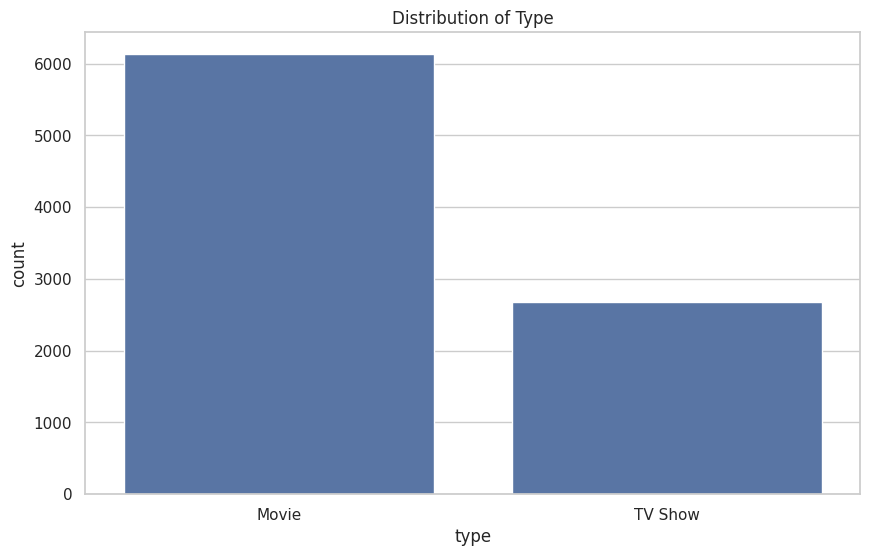

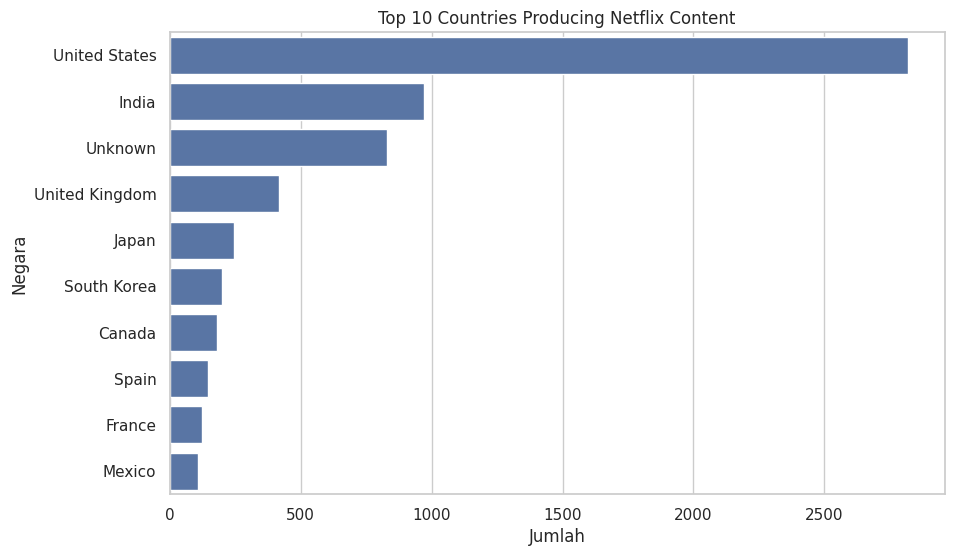

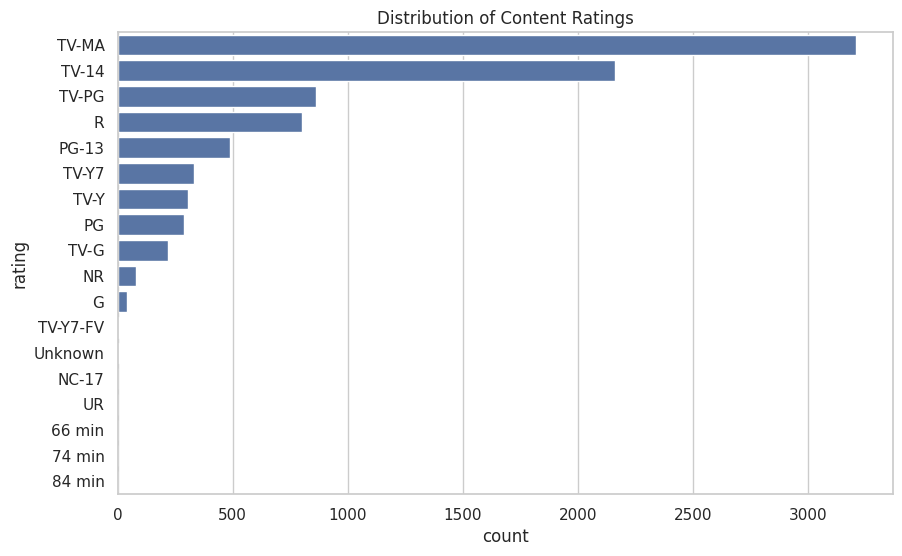

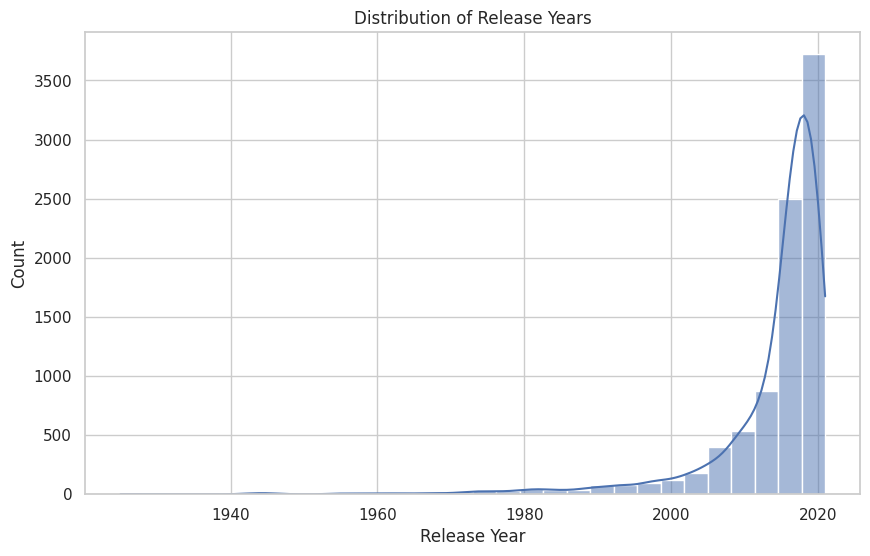

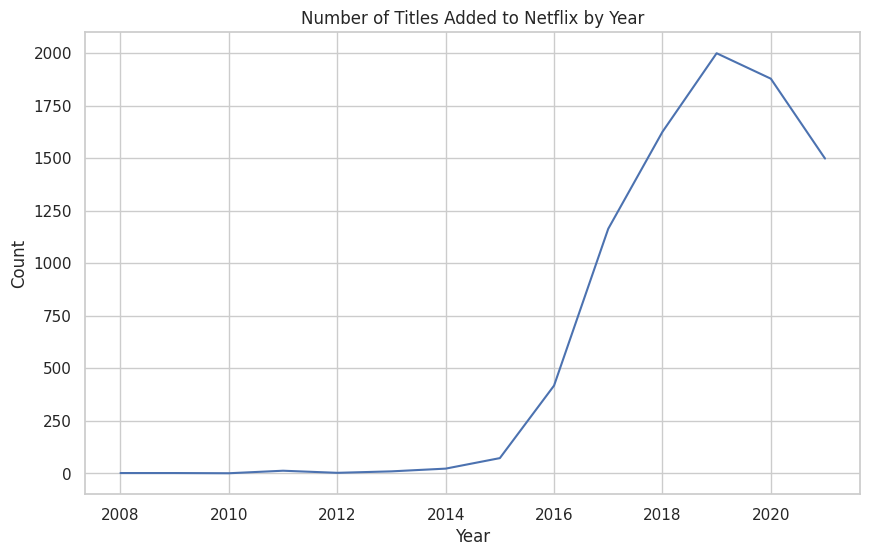

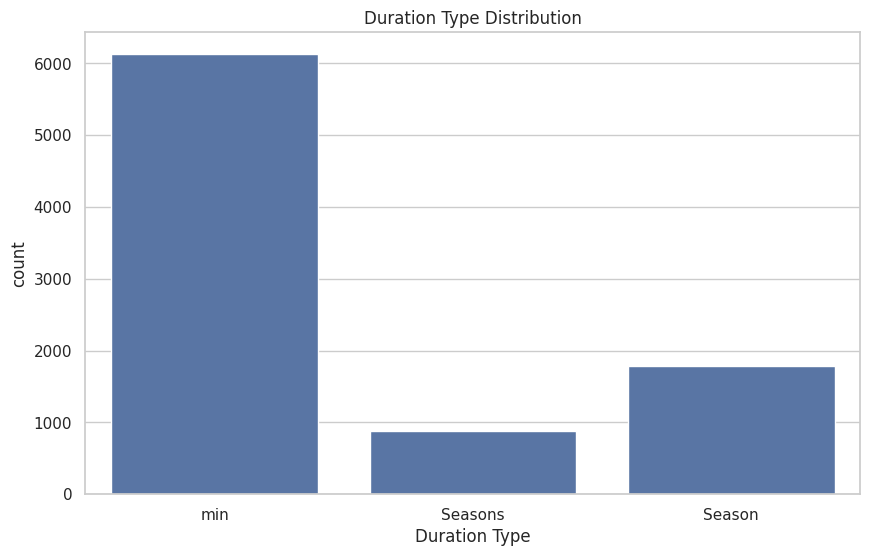

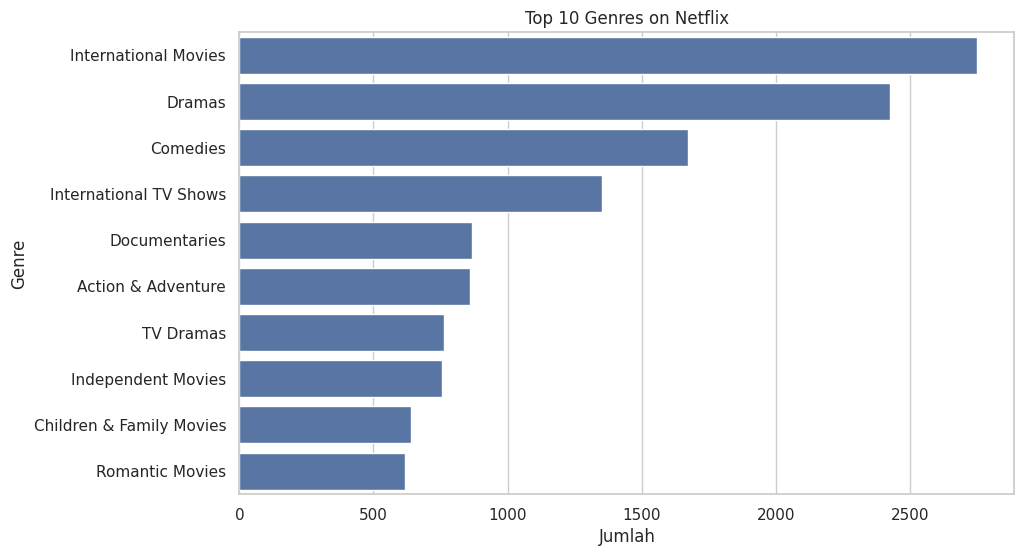

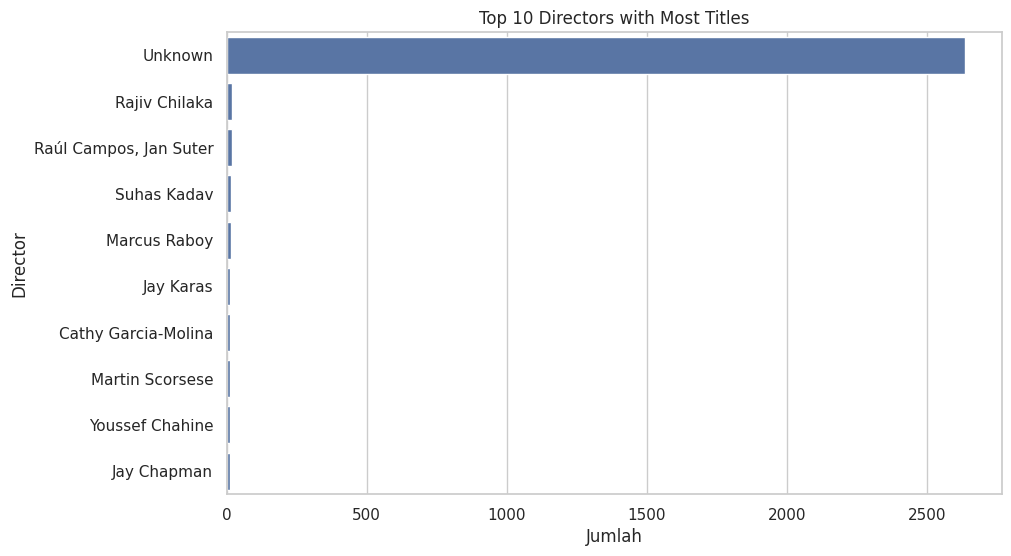

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Type
sns.countplot(data=df, x="type")
plt.title("Distribution of Type")
plt.show()

# 2. Country (Top 10)
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Jumlah")
plt.ylabel("Negara")
plt.show()

# 3. Rating
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.show()

# 4. Release Year
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.show()

# 5. Year Added
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Number of Titles Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 6. Duration Type
sns.countplot(data=df, x='duration_type')
plt.title("Duration Type Distribution")
plt.xlabel("Duration Type")
plt.show()

# 7. Genres
top_genres = dict(Counter(flat_genres).most_common(10))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()))
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Jumlah")
plt.ylabel("Genre")
plt.show()

# 8. Directors
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Jumlah")
plt.ylabel("Director")
plt.show()

In [5]:
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')

df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['type'].value_counts()
df['country'].value_counts()

,count
country,
United States,2818
India,972
Unknown,831
United Kingdom,419
Japan,245
...,...
"Germany, Canada, United States",1
"Denmark, United Kingdom, South Africa, Sweden, Belgium",1
"Serbia, South Korea, Slovenia",1


In [6]:
from collections import Counter

# Drop baris dengan NaN di 'listed_in'
genre_list = df['listed_in'].dropna().str.split(', ')

# Flatten list of lists
flat_genres = [genre.strip() for sublist in genre_list for genre in sublist]

# Hitung jumlah tiap genre
genre_counts = Counter(flat_genres)

# Lihat 10 genre teratas
print(genre_counts.most_common(10))

[('International Movies', 2752), ('Dramas', 2427), ('Comedies', 1674), ('International TV Shows', 1351), ('Documentaries', 869), ('Action & Adventure', 859), ('TV Dramas', 763), ('Independent Movies', 756), ('Children & Family Movies', 641), ('Romantic Movies', 616)]


<Axes: xlabel='year_added'>

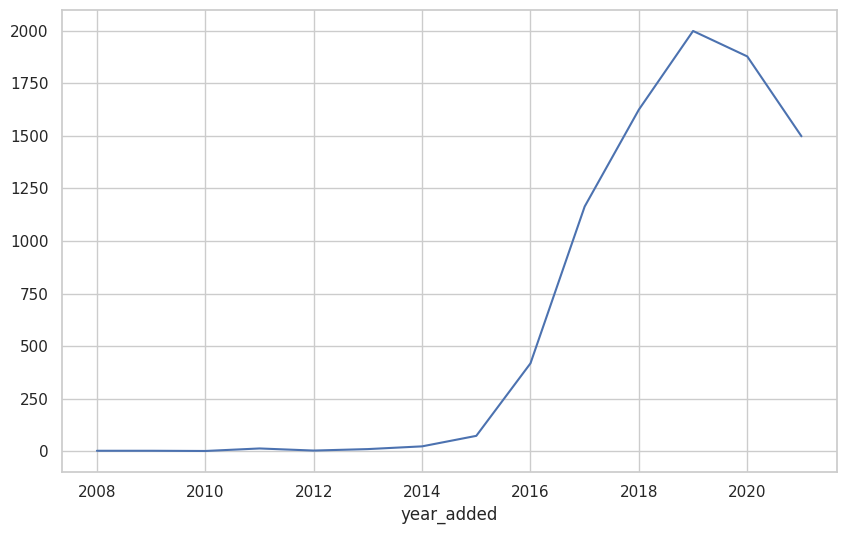

In [7]:
df['year_added'].value_counts().sort_index().plot(kind='line')

<Axes: xlabel='type', ylabel='count'>

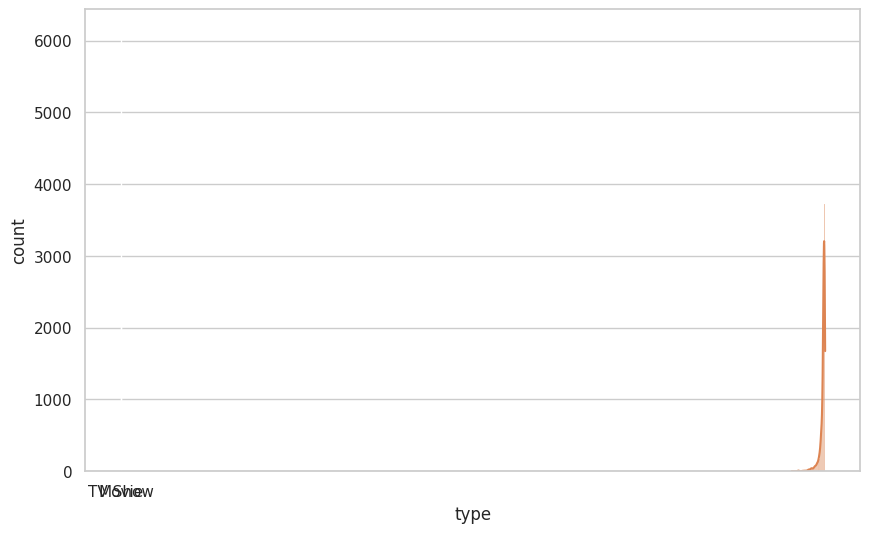

In [8]:
sns.countplot(data=df, x="type")
sns.histplot(df['release_year'], bins=30, kde=True)